# Assignment 1 Cheat Sheet

Welcome to Computational Methods for Informatics!
We'll be providing a "cheat sheet" to help you complete each assignment. Please contact Professor McDougal (robert.mcdougal@yale.edu) or your TA if you have any further questions. If you get stuck, office hours are a great resource. Without further ado, let's dive in to some tools that will help you with assigment 1

## Exercise 1

For assignment 1, we're tasked with writing a function that returns **another function**. This are sometimes called a factory function. Writing factory functions is a very useful skill, since it allows us to create a bunch of related functions whose behavior can be tailored to different situations based on input parameters. This can be a bit confusing the first time you see it, so let's take a look at a couple of examples.

### Example 1

Here we have a very simple example of a factory function that doesn't have any parameters. The outer function's only purpose is to create and return an inner function which we can run later.

In [1]:
def outer_function():
    
    def inner_function():
        print("Hello World")
    
    return inner_function

Now that we have created our factory function, we use it to create the inner function, which we will store in the variable "new_function" so we can access it later. Notice that when we call the outer function, nothing prints to the console because the inner function hasn't been run yet.

In [2]:
new_function = outer_function()

"Hello World" is only printed out when we call "new_function", as shown below

In [3]:
new_function()

Hello World


Let's take a look at a slightly more general example that uses parameters to change the behavior of our inner function

### Example 2

Here we will write a factory function that can create different greeter functions based off of an input parameter. A greeter will just stitch together a greeting with a recipient and return the result as a string

In [4]:
def create_greeter(greeting):    
    
    def greeter(recipient):
        return greeting + " " + recipient
    
    return greeter

Notice that there are two return statements in the cell above. The inner return statement belongs to the greeter function. The outer return statement belongs to the create_greeter function. Only the outer value is actually returned when we call create_greeter.

Let's use our new factory function to create some greeter functions:

In [5]:
hello_greeter = create_greeter("Hello")
welcome_greeter = create_greeter("Welcome")

Our greeter functions are now ready to be called.

In [6]:
hello_world = hello_greeter("World")
print(hello_world)

Hello World


In [7]:
hello_professor = hello_greeter("Professor")
print(hello_professor)

Hello Professor


In [8]:
print(welcome_greeter("Lady Grantham"))
print(welcome_greeter("Your Majesty"))

Welcome Lady Grantham
Welcome Your Majesty


Try creating and running your own greeter function below:

## Exercise 2

In this exercise, we are using pandas to do some basic statistics and visualization on data, which can be loaded into pandas' main data structure, a "DataFrame". Dataframes essentially act like tables, but they have many built in features that make your life easier. For starters, we always need to import the pandas module whenever we want to use dataframes:

In [ ]:
import pandas as pd

Pandas can build dataframes from many kinds of data sources, including files (json, csv, xml), databases, and data that already exists in python. Let's try manually creating a DataFrame. We'll start by creating some lists of values. These lists must be the same length, since pandas is going to combine them into a table-like dataframe.

Each of these lists will become a single column in our dataframe. We will put these lists in a dictionary so that pandas knows what to call each column.

In [10]:
data = {
    "name": ["Spongebob", "Squidward", "Patrick", "Eugene"],
    "job": ["Cook", "Cashier", "Freeloader", "Owner"],
    "salary": [20, 10, 0, 100],
    "bonus": [100, 20, 1, 0]
}

Now we will load our data into pandas and create a dataframe

In [11]:
df = pd.DataFrame(data)

Let's take a closer look at our DataFrame. In an ipynb file (aka jupyter notebook) we can just run a cell with "df" by itself, and pandas will print out a nicely formatted table for us, complete with column labels and indices.

In [12]:
df

,name,job,salary,bonus
0,Spongebob,Cook,20,100
1,Squidward,Cashier,10,20
2,Patrick,Freeloader,0,1
3,Eugene,Owner,100,0


If you have a very large data frame, and you'd like to take a closer look without printing out thousands of rows, just call df.head(number_of_rows), and pandas will print out a truncated table

In [13]:
df.head(2)

,name,job,salary,bonus
0,Spongebob,Cook,20,100
1,Squidward,Cashier,10,20


Suppose we want to do some math on the salary column. We can isolate this column as a "Pandas Series" structure in two equivalent ways:

In [14]:
salaries1 = df.salary #treating salary as an object property
salaries2 = df['salary'] #or by using 'salary' as a key, similar to a dictionary
print(salaries1)
print(salaries2)

0     20
1     10
2      0
3    100
Name: salary, dtype: int64
0     20
1     10
2      0
3    100
Name: salary, dtype: int64


Series are good for restricting your analysis to a single column. They have many built in math and stats functions:

In [15]:
salaries_sum = salaries1.sum()
salaries_product = salaries1.prod()
print(f'Sum: {salaries_sum}')
print(f'Product: {salaries_product}')

Sum: 130
Product: 0


There are similar functions for max, min, standard deviation, mean, median, mode, and many many others. There are too many functions to cover here, so when in doubt, google it.

We can also perform operations on whole dataframes, though some results might be junk if the data type doesn't match the operation

In [16]:
df.max()

name      Squidward
job           Owner
salary          100
bonus           100
dtype: object

### Plotting with pandas
Python has lots of graphing libraries, so you might want to look around and see which one you like best. Some of the most popular ones are Matplotlib, Seaborn, Plotly, and GGPlot. Pandas is built to make plots from dataframes using Matplotlib under the hood. Let's try a basic plot with pandas.

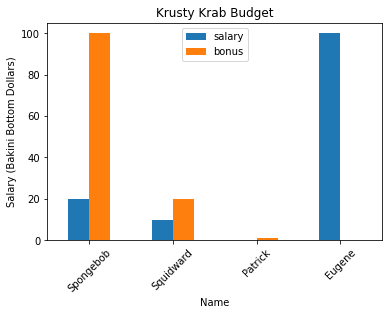

In [17]:
ax = df.plot(
    kind='bar', #specify type of plot
    title= 'Krusty Krab Budget', #Specify plot title
    x='name', #Specify column for x axis
    y=['salary', 'bonus'], #Specify column(s) for y axis
    xlabel='Name', #label x axis
    ylabel='Salary (Bakini Bottom Dollars)', #label y axis
    rot = 45 #rotate labels for each bar
    )

As you can see, we can specify the look of of the graph by passing in various keyword arguments into the df.plot function. The process is quite similar for building line graphs, scatter plots, histograms, and pie charts. Check out [this tutorial](https://www.w3schools.com/python/pandas/pandas_plotting.asp) for more in-depth guidance

## Plotting with GGPlot

You might prefer to use an external library like ggplot (from the plotnine package). Let's give that a try. Plotnine is not usually included in a basic Anaconda distribution so we have to install plotnine using anaconda using the following terminal command:

In [64]:
! conda install -c conda-forge plotnine -y
#this cell runs a command in the terminal using the "!" symbol

Solving environment: done

# All requested packages already installed.



Now that Anaconda has installed plotnine, we can import it into our project:

In [21]:
from plotnine import *

Now that we have our module ready, let's prepare some new data for GGPlot to use. We'll use pandas to directly read some data from a csv file. This file shows some info on the top 100 songs on spotify from 2010 to 2019, and can be found on kaggle:
[Link to dataset](https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019?resource=download)

In [54]:
spot_df = pd.read_csv("spotify.csv").dropna() #loads data into dataframe
spot_df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


Let's suppose we want to visualize the relationships between numerical data on these songs. A very basic plot can be constructed in the following way:

As seen below, each plot is created by the "ggplot" function.

The first input of the ggplot function should be the data we wish to show. The second input is an "aesthetic mapping" specified by the "aes" function that tells ggplot what parts of the data to show, as well various style choices for the plot.

Finally, we "add" geom_point() to tell ggplot we want to see this data represented as dots on a scatterplot.

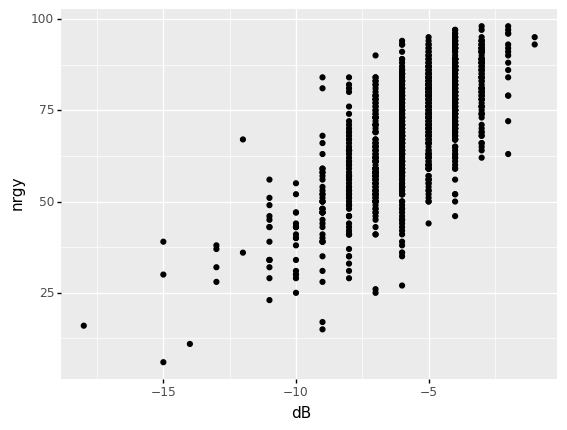

<ggplot: (8775665318925)>

In [55]:
ggplot(spot_df, aes(x='dB', y='nrgy')) + geom_point()

We can make more informative, visually appealing plots by including extra parameters in the aesthetic mapping input:

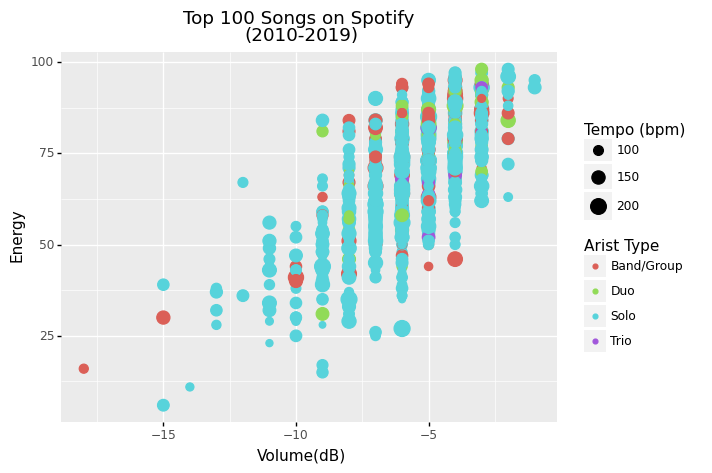

<ggplot: (8775671202265)>

In [63]:
(ggplot(spot_df,#pass in data 
        aes(x='dB',#specify data columns
            y='nrgy', 
            size='bpm', 
            color='artist type')) 
    + geom_point() #specify geometry
    + labs(x='Volume(dB)', #relabel axes & legends
           y='Energy',
           size='Tempo (bpm)', 
           color='Arist Type')
    + ggtitle('Top 100 Songs on Spotify \n(2010-2019)')) #add title 

We can just as easily make different kinds of plots by specifying different aesthetic mappings and adding different geometry

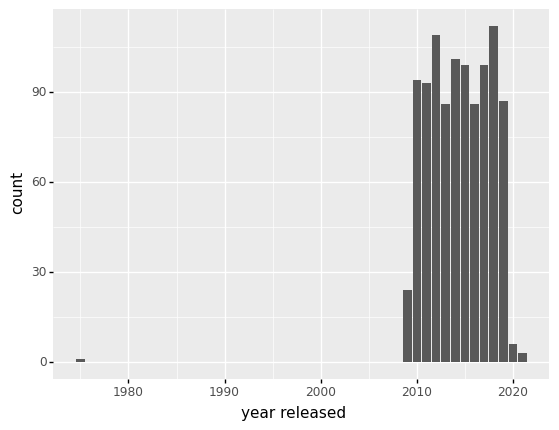

<ggplot: (8775665393134)>

In [57]:
ggplot(spot_df, aes(x='year released')) + geom_bar(stat='count')

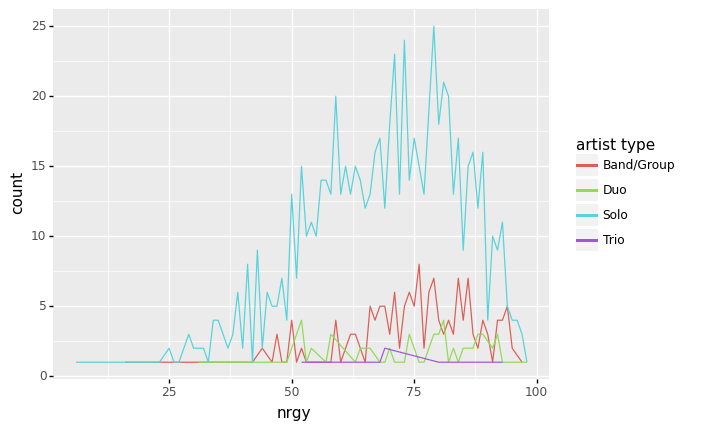

<ggplot: (8775665906384)>

In [62]:
(ggplot(spot_df, aes(x='nrgy', color='artist type'))
    + geom_line(stat='count'))